In [ ]:
# memanggil libarary yang dibutuhkan
# Menggunakan library standar untuk kalsifikasi
import pandas as pd
import string
import numpy as np
import nltk

# import untuk mesin learning naive bayes
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn import model_selection
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

# import untuk mesin learning KNN
from sklearn.neighbors import KNeighborsClassifier

# import untuk mesin learning SVM
from sklearn import svm 

# membuat spliting data = traning/testing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.utils.multiclass import unique_labels
from sklearn.preprocessing import LabelBinarizer, OrdinalEncoder, OneHotEncoder

# visualisasi hasil
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
# membaca data DM
dataMentah='https://raw.githubusercontent.com/snnainiii/Data/main/Data%20NB%20DM%20New.csv'
teks = pd.read_csv(dataMentah, header = 0, delimiter = ",", encoding = 'utf-8')
X = pd.DataFrame(teks)
print(X)

     Nomor  Usia  Glukosa  Tekanan_darah  Ketebalan_kulit  Insulin  BMI  \
0        1    54      148             72               35      148   34   
1        2    43       85             66               29      148   27   
2        3    27      183             64               27      148   23   
3        4    45       89             66               23       94   28   
4        5    55      137             40               35      168   43   
..     ...   ...      ...            ...              ...      ...  ...   
115    116    45      125             70               18      122   29   
116    117    39       96             56               34      115   25   
117    118    33      167             74               17      144   23   
118    119    48      120             80               37      150   42   
119    120    42      156             86               28      155   34   

     Penyakit  
0           1  
1           1  
2           1  
3           1  
4           1  
.. 

In [ ]:
# membuang parameter yang tidak digunakan = nomor
df = X.drop('Nomor', axis = 1)
print(df)

     Usia  Glukosa  Tekanan_darah  Ketebalan_kulit  Insulin  BMI  Penyakit
0      54      148             72               35      148   34         1
1      43       85             66               29      148   27         1
2      27      183             64               27      148   23         1
3      45       89             66               23       94   28         1
4      55      137             40               35      168   43         1
..    ...      ...            ...              ...      ...  ...       ...
115    45      125             70               18      122   29         1
116    39       96             56               34      115   25         0
117    33      167             74               17      144   23         1
118    48      120             80               37      150   42         1
119    42      156             86               28      155   34         1

[120 rows x 7 columns]


In [ ]:
dt = df.groupby("Penyakit")
Diabet_imbalanced = dt["Penyakit"].count()[1]
Bukan_imbalanced = dt["Penyakit"].count()[0]
dt["Penyakit"].count()

Penyakit
0    37
1    83
Name: Penyakit, dtype: int64

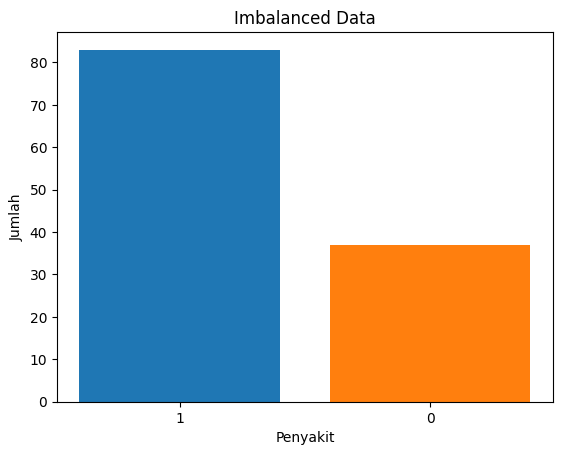

In [ ]:
import matplotlib.pyplot as plt

def tampilkan_visualisasi(jumlah_diabet, jumlah_bukan):
    labels = ['1','0']
    jumlah_label = [jumlah_diabet, jumlah_bukan]
    colors = ['#1f77b4', '#ff7f0e']

    plt.bar(labels, jumlah_label, color=colors)
    plt.xlabel('Penyakit')
    plt.ylabel('Jumlah')
    plt.title('Imbalanced Data')

    plt.show()

tampilkan_visualisasi(Diabet_imbalanced, Bukan_imbalanced)

## Over Sampling

In [ ]:

import pandas as pd
from imblearn.over_sampling import SMOTE

# Contoh DataFrame dengan kolom target
data = df

# Memisahkan fitur dan target
target = 'Penyakit'
X = df.drop(target, axis=1)
y = df[target]


# # Menerapkan SMOTE untuk oversampling
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X,y)

# Menampilkan hasil oversampling
oversampled_df = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.Series(y_resampled, name='Penyakit')], axis=1)

print("Jumlah sampel setelah oversampling:")
print(y_resampled.value_counts())
oversampled_df


Jumlah sampel setelah oversampling:
1    83
0    83
Name: Penyakit, dtype: int64


,Usia,Glukosa,Tekanan_darah,Ketebalan_kulit,Insulin,BMI,Penyakit
0,54,148,72,35,148,34,1
1,43,85,66,29,148,27,1
2,27,183,64,27,148,23,1
3,45,89,66,23,94,28,1
4,55,137,40,35,168,43,1
...,...,...,...,...,...,...,...
161,52,118,92,27,147,34,0
162,51,118,90,26,147,33,0
163,36,112,74,35,36,33,0
164,34,163,76,34,251,37,0


In [ ]:
oversampled_df.to_csv('balanced_Oversampled.csv', index=False)

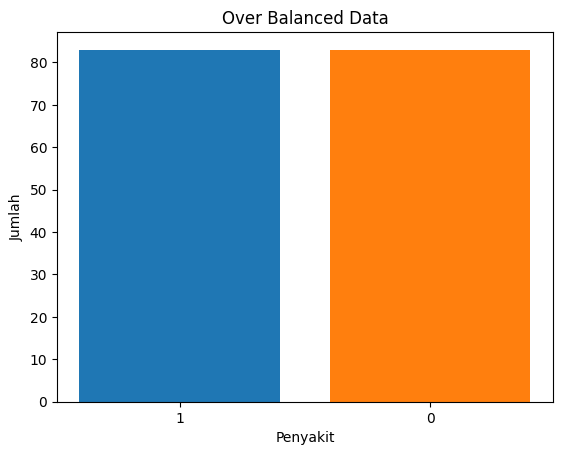

In [ ]:
import matplotlib.pyplot as plt

dt_oversampled = oversampled_df.groupby("Penyakit")
diabet_balanced = dt_oversampled['Penyakit'].count()[1]
bukan_balanced = dt_oversampled['Penyakit'].count()[0]

def tampilkan_visualisasi(jumlah_diabet, jumlah_bukan):
    labels = ['1','0']
    jumlah_label = [jumlah_diabet, jumlah_bukan]
    colors = ['#1f77b4', '#ff7f0e']

    plt.bar(labels, jumlah_label, color=colors)
    plt.xlabel('Penyakit')
    plt.ylabel('Jumlah')
    plt.title('Over Balanced Data')

    plt.show()

tampilkan_visualisasi(diabet_balanced, bukan_balanced)

In [ ]:
X_over = oversampled_df.iloc[:,0:-1].values
Y_over = oversampled_df.iloc[:, -1].values

In [ ]:
# parameter
print(X_over)
print("jumlah data = ",X_over.shape)

[[ 54 148  72  35 148  34]
 [ 43  85  66  29 148  27]
 [ 27 183  64  27 148  23]
 [ 45  89  66  23  94  28]
 [ 55 137  40  35 168  43]
 [ 57 116  74  27 148  26]
 [ 56  78  50  32  88  31]
 [ 55 115  73  27 148  35]
 [ 67 197  70  45 543  31]
 [ 55 125  96  27 148   0]
 [ 51 110  92  27 148  38]
 [ 49 168  74  27 148  38]
 [ 48 139  80  27 148  27]
 [ 40 189  60  23 846  30]
 [ 48 166  72  19 175  26]
 [ 60 100  73  27 148  30]
 [ 65 118  84  47 230  46]
 [ 34 107  74  27 148  30]
 [ 57 103  30  38  83  43]
 [ 58 115  70  30  96  35]
 [ 45 126  88  41 235  39]
 [ 41  99  84  27 148  35]
 [ 44 196  90  27 148  40]
 [ 49 119  80  35 148  29]
 [ 55 143  94  33 146  37]
 [ 39 125  70  26 115  31]
 [ 75 147  76  27 148  39]
 [ 57 145  82  19 110  22]
 [ 52 117  92  27 148  34]
 [ 49 109  75  26 148  36]
 [ 23 158  76  36 245  32]
 [ 63  88  58  11  54  25]
 [ 59  92  92  27 148  20]
 [ 46 122  78  31 148  28]
 [ 52 138  76  27 148  33]
 [ 25 102  76  37 148  33]
 [ 19  90  68  42 148  38]
 

In [ ]:
# target
print(Y_over)
print('jumlah data', Y_over.shape)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1
 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 0 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 0 0 1
 1 1 1 0 1 0 0 1 1 1 0 0 1 1 1 1 1 0 0 0 1 1 0 0 1 1 0 1 1 0 0 1 0 1 0 1 1
 1 1 1 1 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
jumlah data (166,)


## Spliting Data Over

In [ ]:
# spliting data setelah over sampling
from sklearn.model_selection import train_test_split
X_train_over, X_test_over, y_train_over, y_test_over = train_test_split(X_over, Y_over, test_size = 0.25, random_state = 1 )
print(X_train_over.shape)
print(y_train_over.shape)
print(X_test_over.shape)
print(y_test_over.shape)

(124, 6)
(124,)
(42, 6)
(42,)


In [ ]:
# jumlah data parameter unutk traning
print(X_train_over)
print("jumlah data traning",len(X_train_over))

[[ 51 143  94  33 146  37]
 [ 25  68  70  32  66  25]
 [ 33 167  74  17 144  23]
 [ 39 160  54  32 175  31]
 [ 59 141  86  13 309  27]
 [ 48 139  80  27 148  27]
 [ 60 181  68  36 495  30]
 [ 42 114  71  42  98  34]
 [ 52 117  92  27 148  34]
 [ 47 163  72  41 114  41]
 [ 27  69  69  30  65  25]
 [ 45 153  78  29 100  30]
 [ 34 107  74  27 148  30]
 [ 21 138  60  35 167  35]
 [ 23 107  74  30 100  34]
 [ 40 189  60  23 846  30]
 [ 39  96  56  34 115  25]
 [ 57 103  30  38  83  43]
 [ 37  98  69  22 142  26]
 [ 44  97  66  15 140  23]
 [ 81 134  74  33  60  26]
 [ 55 137  40  35 168  43]
 [ 49 103  60  33 192  24]
 [ 53 197  70  45 543  31]
 [ 19  90  68  42 148  38]
 [ 59  95  61  13  54  24]
 [ 56 129  74  32 218  41]
 [ 60 135  61  32 190  30]
 [ 57 145  82  19 110  22]
 [ 41  99  84  27 148  35]
 [ 27 183  64  27 148  23]
 [ 53 145  88  34 165  30]
 [ 52 118  92  27 147  34]
 [ 56  78  50  32  88  31]
 [ 54 148  72  35 148  34]
 [ 49 160  71  37 308  40]
 [ 48 120  72  22  56  21]
 

In [ ]:
# jumlah parameter untuk testing
print(X_test_over)
print("jumlah data testing",len(X_test_over))

[[ 62 105  73  27 148   0]
 [ 42 180  64  25  70  34]
 [ 52 138  76  27 148  33]
 [ 24 171  72  33 135  33]
 [ 46 182  91  28 147  39]
 [ 49 168  74  27 148  38]
 [ 58 144  82  26 285  32]
 [ 25 102  76  37 148  33]
 [ 40 145  80  46 130  38]
 [ 48 166  72  19 175  26]
 [ 49 138  76  27 135  28]
 [ 61 142  60  33 190  29]
 [ 56 111  72  47 207  37]
 [ 58 115  70  30  96  35]
 [ 44  92  62   7 258  28]
 [ 42 118  77  32 148  28]
 [ 52 176  86  27 156  33]
 [ 52 131  80  27 148  33]
 [ 26  88  30  42  99  55]
 [ 25 125  70  24 110  24]
 [ 40 168  88  42 321  38]
 [ 49 109  75  26 148  36]
 [ 46 106  92  18 148  23]
 [ 52 138  76  23 127  24]
 [ 51 155  76  28 150  33]
 [ 51 136  74  26 135  26]
 [ 57 116  74  27 148  26]
 [ 54 171 110  24 240  45]
 [ 57 196  76  29 280  38]
 [ 65 118  84  47 230  46]
 [ 63  88  58  11  54  25]
 [ 50 164  82  43  67  33]
 [ 39 159  64  27 148  27]
 [ 50 138  74  26 144  36]
 [ 53 187  76  27 207  44]
 [ 56 146  56  27 148  30]
 [ 41  98  62  36 111  29]
 

In [ ]:
# jumlah data untuk target traning
print(y_train_over)
print("jumlah data traning",len(y_train_over))

[1 0 1 1 0 1 1 0 0 1 0 0 1 1 0 1 0 1 0 0 0 1 0 1 1 0 0 0 0 1 1 1 0 1 1 0 0
 1 1 1 0 1 0 1 0 0 1 1 0 1 0 0 0 1 1 0 0 0 0 1 1 1 0 0 1 0 0 1 1 1 0 0 0 1
 1 1 0 1 0 1 0 1 1 1 0 0 1 0 1 0 0 0 1 1 1 0 1 1 0 0 0 1 0 0 1 0 1 1 0 0 0
 1 1 1 0 0 0 0 0 0 0 0 0 1]
jumlah data traning 124


In [ ]:
# jumlah data untuk target testing
print(y_test_over)
print("jumlah data testing",len(y_test_over))

[1 1 0 1 0 1 1 0 1 1 0 0 1 1 1 0 1 0 1 0 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 1 0
 1 0 0 0 0]
jumlah data testing 42


In [ ]:
# # AKURASI DATA OVER

# from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
# prediction_data_over = oversampled_df.predict(X_test_over)
# accuracies_data_over = accuracy_score(y_test_over, prediction_data_over)
# print(prediction_data_over)
# print(accuracies_data_over)

In [ ]:
# # AKURASI DATA OVER
# from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# prediction_data_over = oversampled_df.predict(X_test_over)

# accuracies_data_over = accuracy_score(y_test_over, prediction_data_over)

# print(prediction_data_over)
# print(accuracies_data_over)

In [ ]:
# from sklearn.model_selection import KFold

# # Data sebanyak 166
# data = range(74)
# # data = oversampled_df

# # Jumlah fold (K) yang diinginkan
# k = 5

# # Membuat objek KFold
# kf = KFold(n_splits=k)

# # Melakukan split data menggunakan K-Fold Cross Validation
# fold = 1
# for train_index, test_index in kf.split(data):
#     train_data = [data[i] for i in train_index]
#     test_data = [data[i] for i in test_index]
    
#     # Menampilkan hasil split
#     print(f"Fold {fold}:")
#     print("Train data:", train_data)
#     print("Test data:", test_data)
#     print()
    
#     fold += 1


## Under Sampling

In [ ]:
import pandas as pd
from imblearn.under_sampling import RandomUnderSampler

# Contoh DataFrame dengan kolom target
data = df

# Memisahkan fitur dan target
target = 'Penyakit'
X = df.drop(target, axis=1)
y = df[target]


# Menerapkan Random Under-sampling
rus = RandomUnderSampler()
X_resampled, y_resampled = rus.fit_resample(X, y)

# Menampilkan hasil undersampling
undersampled_df = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.Series(y_resampled, name='Penyakit')], axis=1)
print("Jumlah sampel setelah oversampling:")
print(y_resampled.value_counts())
print(undersampled_df)

Jumlah sampel setelah oversampling:
0    37
1    37
Name: Penyakit, dtype: int64
    Usia  Glukosa  Tekanan_darah  Ketebalan_kulit  Insulin  BMI  Penyakit
0     44      196             90               27      148   40         0
1     55      143             94               33      146   37         0
2     75      147             76               27      148   39         0
3     57      145             82               19      110   22         0
4     52      117             92               27      148   34         0
..   ...      ...            ...              ...      ...  ...       ...
69    53      187             76               27      207   44         1
70    44       92             62                7      258   28         1
71    46      106             92               18      148   23         1
72    48      139             80               27      148   27         1
73    26      181             88               44      510   43         1

[74 rows x 7 columns]


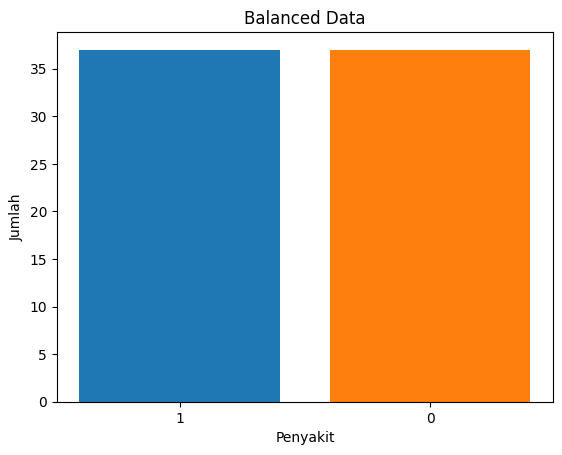

In [ ]:
import matplotlib.pyplot as plt

dt_oversampled = undersampled_df.groupby("Penyakit")
diabet_balanced = dt_oversampled['Penyakit'].count()[1]
bukan_balanced = dt_oversampled['Penyakit'].count()[0]

def tampilkan_visualisasi(jumlah_diabet, jumlah_bukan):
    labels = ['1','0']
    jumlah_label = [jumlah_diabet, jumlah_bukan]
    colors = ['#1f77b4', '#ff7f0e']

    plt.bar(labels, jumlah_label, color=colors)
    plt.xlabel('Penyakit')
    plt.ylabel('Jumlah')
    plt.title('Balanced Data')

    plt.show()

tampilkan_visualisasi(diabet_balanced, bukan_balanced)

In [ ]:
X_under = undersampled_df.iloc[:,0:-1].values
Y_under = undersampled_df.iloc[:, -1].values

In [ ]:
# parameter
print(X_under)
print("jumlah data = ",X_under.shape)

[[ 44 196  90  27 148  40]
 [ 55 143  94  33 146  37]
 [ 75 147  76  27 148  39]
 [ 57 145  82  19 110  22]
 [ 52 117  92  27 148  34]
 [ 23 158  76  36 245  32]
 [ 63  88  58  11  54  25]
 [ 59  92  92  27 148  20]
 [ 46 122  78  31 148  28]
 [ 52 138  76  27 148  33]
 [ 25 102  76  37 148  33]
 [ 49 103  60  33 192  24]
 [ 44  97  66  15 140  23]
 [ 50 164  82  43  67  33]
 [ 51 136  74  26 135  26]
 [ 58 173  78  32 265  47]
 [ 45 154  78  30 100  31]
 [ 55 103  72  32 190  38]
 [ 42 150  66  42 342  35]
 [ 45 102  74  40 105  37]
 [ 46 100  84  33 105  30]
 [ 48 120  72  22  56  21]
 [ 34 123  80  15 176  32]
 [ 29  86  66  52  65  41]
 [ 25 125  70  24 110  24]
 [ 25  68  70  32  66  25]
 [ 23 107  74  30 100  34]
 [ 40 123  70  44  94  33]
 [ 49 126  88  36 108  39]
 [ 63 101  76  48 180  33]
 [ 81 134  74  33  60  26]
 [ 60 129  90   7 326  20]
 [ 61 142  60  33 190  29]
 [ 39 153  88  37 140  41]
 [ 40 126  78  27  22  30]
 [ 57 145  82  19 110  22]
 [ 39  96  56  34 115  25]
 

In [ ]:
# target
print(Y_under)
print('jumlah data', Y_under.shape)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
jumlah data (74,)


## Spliting Data Under

In [ ]:
# membuat data traning dan data testing dari dataset setelah under sampling
from sklearn.model_selection import train_test_split
X_train_under, X_test_under, y_train_under, y_test_under = train_test_split(X_under, Y_under, test_size = 0.25, random_state = 1 )
print(X_train_under.shape)
print(y_train_under.shape)
print(X_test_under.shape)
print(y_test_under.shape)

(55, 6)
(55,)
(19, 6)
(19,)


In [ ]:
# jumlah data parameter unutk traning
print(X_train_under)
print("jumlah data traning",len(X_train_under))

[[ 55 125  96  27 148   0]
 [ 43  85  66  29 148  27]
 [ 48 139  80  27 148  27]
 [ 59 189  60  23 846  30]
 [ 43 100  74  40 215  39]
 [ 39  96  56  34 115  25]
 [ 52 124  76  24 600  29]
 [ 60 129  90   7 326  20]
 [ 51 143  94  33 146  37]
 [ 66 103  66  32 148  39]
 [ 48 120  72  22  56  21]
 [ 26  88  30  42  99  55]
 [ 57 145  82  19 110  22]
 [ 39 160  54  32 175  31]
 [ 21 138  60  35 167  35]
 [ 47 161  68  23 132  26]
 [ 67 197  70  45 543  31]
 [ 25 125  70  24 110  24]
 [ 46 122  78  31 148  28]
 [ 55 103  72  32 190  38]
 [ 44 196  90  27 148  40]
 [ 48 120  80  37 150  42]
 [ 54 111  72  47 207  37]
 [ 59  92  92  27 148  20]
 [ 46 106  92  18 148  23]
 [ 42 180  64  25  70  34]
 [ 50 164  82  43  67  33]
 [ 34 123  80  15 176  32]
 [ 61 142  60  33 190  29]
 [ 81 134  74  33  60  26]
 [ 33 137  40  35 168  43]
 [ 33 167  74  17 144  23]
 [ 29  86  66  52  65  41]
 [ 52 117  92  27 148  34]
 [ 53 187  76  27 207  44]
 [ 51 136  74  26 135  26]
 [ 63 101  76  48 180  33]
 

In [ ]:
# jumlah parameter untuk testing
print(X_test_under)
print("jumlah data testing",len(X_test_under))

[[ 45 102  74  40 105  37]
 [ 40 145  80  46 130  38]
 [ 25 102  76  37 148  33]
 [ 44  92  62   7 258  28]
 [ 19  90  68  42 148  38]
 [ 23 107  74  30 100  34]
 [ 60 100  73  27 148  30]
 [ 39 153  88  37 140  41]
 [ 40 126  78  27  22  30]
 [ 40 168  88  42 321  38]
 [ 54 148  72  35 148  34]
 [ 49 119  80  35 148  29]
 [ 75 147  76  27 148  39]
 [ 50 148  72  35 148  34]
 [ 40 123  70  44  94  33]
 [ 53 197  70  45 543  31]
 [ 58 173  78  32 265  47]
 [ 40 189  60  23 846  30]
 [ 57 145  82  19 110  22]]
jumlah data testing 19


In [ ]:
# jumlah data untuk target traning
print(y_train_under)
print("jumlah data traning",len(y_train_under))

[1 1 1 1 1 0 1 0 1 1 0 1 0 1 1 1 1 0 0 0 0 1 1 0 1 1 0 0 0 0 1 1 0 0 1 0 0
 0 1 0 1 0 1 1 0 1 0 0 0 0 1 0 0 0 1]
jumlah data traning 55


In [ ]:
# jumlah dat untuk target testing
print(y_test_under)
print("jumlah data testing",len(y_test_under))

[0 1 0 1 1 0 1 0 0 1 1 1 0 1 0 1 0 1 0]
jumlah data testing 19


In [ ]:
# #AKURASI DATA UNDER
# from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
# prediction_data_under = undersampled_df.predict(X_test_under)
# accuracies_data_under = accuracy_score(y_test_under, prediction_data_under)

# print(prediction_data_under)
# print(accuracies_data_under)

# MODEL NAIVE BAYES

# naive bayes OVER

In [ ]:
# membangun mode NBC denegan over sampling
from sklearn.naive_bayes import GaussianNB
oversampled_df= GaussianNB()
oversampled_df.fit(X_over, Y_over)

GaussianNB()

In [ ]:
# prediksi terhadap model traning yang telah dibuat untuk OVER
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
prediction_over = oversampled_df.predict(X_test_over)
accuracies_over = accuracy_score(y_test_over, prediction_over)

print(prediction_over)
print(accuracies_over)

[1 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 1 1 1 0 0 0 0 1 0 0
 1 0 0 0 0]
0.6666666666666666


In [ ]:
# menampilkan matrix konfusi over sampling
print(confusion_matrix(y_test_over, prediction_over))

[[16  1]
 [13 12]]


In [ ]:
# akurasi OVER
akurasi_over = classification_report(y_test_over, prediction_over)
print(akurasi_over)

              precision    recall  f1-score   support

           0       0.55      0.94      0.70        17
           1       0.92      0.48      0.63        25

    accuracy                           0.67        42
   macro avg       0.74      0.71      0.66        42
weighted avg       0.77      0.67      0.66        42



In [ ]:
#procedure untuk memetakan matrik konfusi
def plot_confusion_matrix(y_true,y_pred,classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    if not title:
      if normalize:
        title = 'Normalized confusion matrix'
      else:
        title = "confussion matrix, without normalization"
  
    # compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    #only user the labels that appeat in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
    else:
      print('confussion matrix, without normalization')
    
    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation = 'nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # we want to show all ticks
    ax.set(xticks = np.arange(cm.shape[1]),
          yticks = np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels = classes, yticklabels = classes,
           title = title,
           ylabel = 'True label',
           xlabel = 'Predicted label')
    
    # rotate the tick labels and set their aligment
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode ="anchor")
    
    # loop over data dimention and create text annotation
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max()/2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j,i,format(cm[i,j],fmt),
                    ha="center", va="center",
                    color="white" if cm[i,j]> thresh else "black")
        fig.tight_layout()
    return ax


confussion matrix, without normalization
[[16  1]
 [13 12]]
Normalized confusion matrix
[[0.94 0.06]
 [0.52 0.48]]


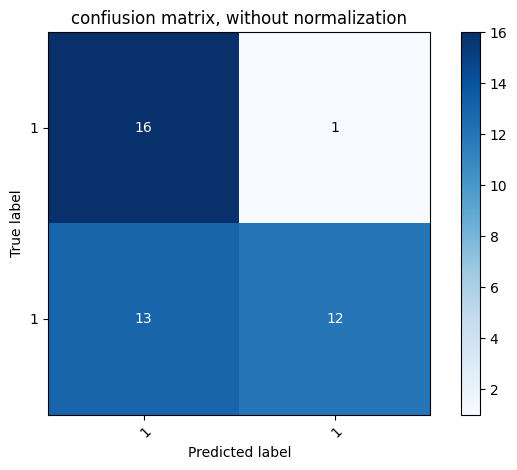

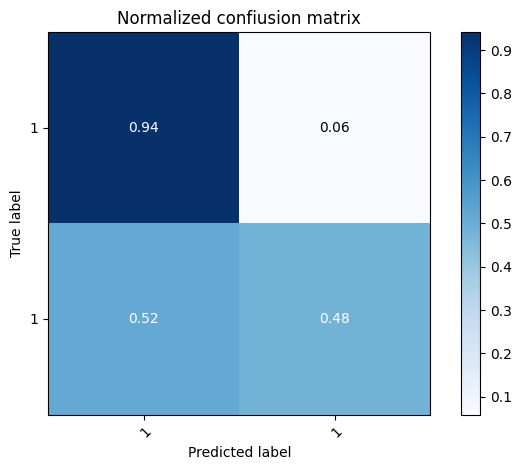

In [ ]:
# visualisasi hasil OVER SAMPLING
class_names = Y_over
np.set_printoptions(precision=2)

# plot non-normalized confusion matrix
plot_confusion_matrix(y_test_over, prediction_over, classes=class_names,
                      title ='confiusion matrix, without normalization')
# plot normalized confusion matrix 
plot_confusion_matrix(y_test_over, prediction_over, classes=class_names,normalize=True,
                      title ='Normalized confiusion matrix')

plt.show()

In [ ]:
# Menyimpan model NBC OVER
import pickle
pickle.dump(oversampled_df, open('modelNBC_over.sav', 'wb'))

# naive bayes UNDER

In [ ]:
# membangun mode NBC denegan under sampling
from sklearn.naive_bayes import GaussianNB
undersampled_df = GaussianNB()
undersampled_df.fit(X_under, Y_under)

GaussianNB()

In [ ]:
# prediksi terhadap model traning yang telah dibuat untuk UNDER
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
prediction_under = undersampled_df.predict(X_test_under)
accuracies_under = accuracy_score(y_test_under, prediction_under)

print(prediction_under)
print(accuracies_under)

[0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0]
0.5789473684210527


In [ ]:
# menampilkan matrix konfusi under sampling
print(confusion_matrix(y_test_under, prediction_under))

[[8 1]
 [7 3]]


In [ ]:
#procedure untuk memetakan matrik konfusi
def plot_confusion_matrix(y_true,y_pred,classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    if not title:
      if normalize:
        title = 'Normalized confusion matrix'
      else:
        title = "confussion matrix, without normalization"
  
    # compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    #only user the labels that appeat in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
    else:
      print('confussion matrix, without normalization')
    
    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation = 'nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # we want to show all ticks
    ax.set(xticks = np.arange(cm.shape[1]),
          yticks = np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels = classes, yticklabels = classes,
           title = title,
           ylabel = 'True label',
           xlabel = 'Predicted label')
    
    # rotate the tick labels and set their aligment
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode ="anchor")
    
    # loop over data dimention and create text annotation
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max()/2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j,i,format(cm[i,j],fmt),
                    ha="center", va="center",
                    color="white" if cm[i,j]> thresh else "black")
        fig.tight_layout()
    return ax


confussion matrix, without normalization
[[8 1]
 [7 3]]
Normalized confusion matrix
[[0.89 0.11]
 [0.7  0.3 ]]


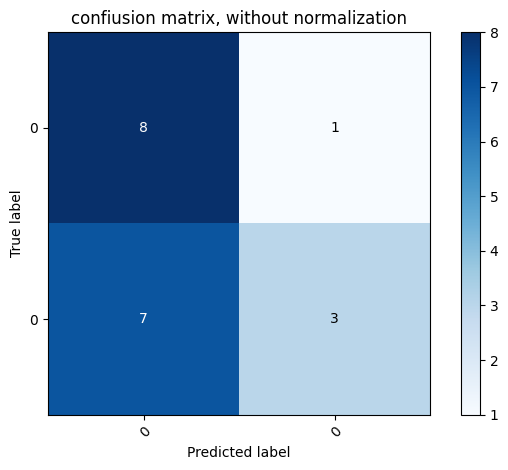

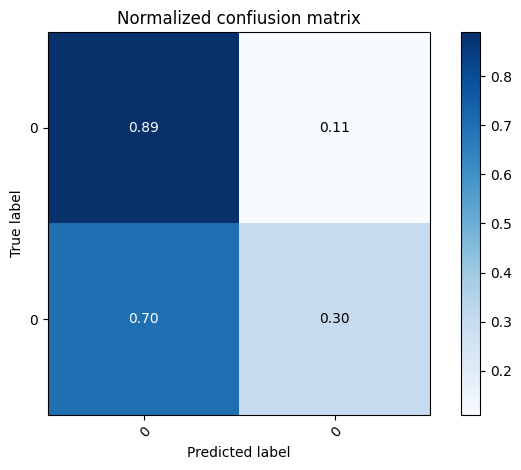

In [ ]:
# visualisasi hasil UNDER SAMPLING
class_names = Y_under
np.set_printoptions(precision=2)

# plot non-normalized confusion matrix
plot_confusion_matrix(y_test_under, prediction_under, classes=class_names,
                      title ='confiusion matrix, without normalization')
# plot normalized confusion matrix 
plot_confusion_matrix(y_test_under, prediction_under, classes=class_names,normalize=True,
                      title ='Normalized confiusion matrix')

plt.show()

In [ ]:
# Menyimpan model NBC UNDER
import pickle
pickle.dump(undersampled_df, open('modelNBC_under.sav', 'wb'))

# MODEL KNN

# KNN OVER

In [ ]:
# # menantukan nilai K yang optimal untuk OVER
# # kode tersebut akan mencetak tingkat kesalahan terendah dan nilai K yang sesuai untuk mencapai tingkat kesalahan tersebut.
# error_rate = [] # untuk menyimpan tingkat kesalahan (error rate) dari model KNN untuk setiap nilai K yang diuji
# for i in range(1, 124):
#   knn = KNeighborsClassifier(n_neighbors = i)
#   knn.fit(X_train_over, y_train_over) # untuk melatih Model KNN  menggunakan data latih yang telah di-oversampling dan label yang sesuai 
#   pred_i = knn.predict(X_test_over)
#   error_rate.append(np.mean(pred_i!= y_test_over))
# print('Minimum error:', min(error_rate), "at K = ", error_rate.index(min(error_rate)))

In [ ]:
# membuat model KNN untuk OVER
knn_over = KNeighborsClassifier(n_neighbors = 5, metric = 'euclidean', p = 2)
knn_over.fit(X_train_over, y_train_over)

KNeighborsClassifier(metric='euclidean')

In [ ]:
# prediksi OVER
y_pred_over = knn_over.predict(X_test_over)
print(y_pred_over)

[1 0 0 1 1 1 0 1 0 1 0 1 0 0 1 1 1 0 0 0 1 1 0 0 1 0 1 0 0 1 0 0 1 0 1 1 0
 1 0 0 0 1]


In [ ]:
# confussion matrix OVER
cm_over = confusion_matrix(y_test_over, y_pred_over)
print(cm_over)

[[12  5]
 [10 15]]


In [ ]:
# akurasi OVER
akurasi_over = classification_report(y_test_over, y_pred_over)
print(akurasi_over)

              precision    recall  f1-score   support

           0       0.55      0.71      0.62        17
           1       0.75      0.60      0.67        25

    accuracy                           0.64        42
   macro avg       0.65      0.65      0.64        42
weighted avg       0.67      0.64      0.65        42



In [ ]:
# Menyimpan model KNN OVER
import pickle
pickle.dump(knn_over, open('modelKNN_over.sav', 'wb'))

# KNN UNDER

In [ ]:
# # menantukan nilai K yang optimal untuk UNDER
# error_rate = []
# for i in range(1, 55):
#   knn = KNeighborsClassifier(n_neighbors = i)
#   knn.fit(X_train_under, y_train_under)
#   pred_i = knn.predict(X_test_under)
#   error_rate.append(np.mean(pred_i!= y_test_under))
# print('Minimum error:', min(error_rate), "at K = ", error_rate.index(min(error_rate)))


In [ ]:
# membuat model KNN untuk OVER
knn_under = KNeighborsClassifier(n_neighbors = 5, metric = 'euclidean', p = 2)
knn_under.fit(X_train_under, y_train_under)

KNeighborsClassifier(metric='euclidean')

In [ ]:
# prediksi UNDER
y_pred_under = knn_under.predict(X_test_under)
print(y_pred_under)

[0 1 1 0 0 0 1 1 0 0 1 0 1 1 0 1 0 1 0]


In [ ]:
# confussion matrix UNDER
cm_under = confusion_matrix(y_test_under, y_pred_under)
print(cm_under)

[[6 3]
 [4 6]]


In [ ]:
# akurasi UNDER
akurasi_under = classification_report(y_test_under, y_pred_under)
print(akurasi_under)

              precision    recall  f1-score   support

           0       0.60      0.67      0.63         9
           1       0.67      0.60      0.63        10

    accuracy                           0.63        19
   macro avg       0.63      0.63      0.63        19
weighted avg       0.64      0.63      0.63        19



In [ ]:
# Menyimpan model KNN UNDER
import pickle
pickle.dump(knn_under, open('modelKNN_under.sav', 'wb'))

# MODEL SVM

# SVM OVER

In [ ]:
# membuat model SVM OVER
classifier_over = svm.SVC(kernel='linear')
classifier_over.fit(X_train_over,y_train_over)

SVC(kernel='linear')

In [ ]:
# akurasi traning
X_train_prediction = classifier_over.predict(X_train_over)
training_data_accuracy = accuracy_score(X_train_prediction, y_train_over)
print('Akurasi data training adalah - ', training_data_accuracy)

Akurasi data training adalah -  0.717741935483871


In [ ]:
# akurasi testing
X_test_prediction = classifier_over.predict(X_test_over)
test_data_accuracy = accuracy_score(X_test_prediction, y_test_over)
print('Akurasi data testing adalah - ', test_data_accuracy)

Akurasi data testing adalah -  0.8095238095238095


In [ ]:
# prediksi terhadap model testing yang telah dibuat untuk OVER
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
prediction_over = classifier_over.predict(X_test_over)
accuracies_over = accuracy_score(y_test_over, prediction_over)

print(prediction_over)
print("akurasinya adalah = ",accuracies_over)

[0 1 0 1 1 1 1 0 1 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 1 1 1 0 0 1 1 1 1 0
 1 0 0 0 0]
akurasinya adalah =  0.8095238095238095


In [ ]:
# confussion matrix OVER
svm_over = confusion_matrix(y_test_over, prediction_over)
print(svm_over)

[[16  1]
 [ 7 18]]


In [ ]:
# akurasi OVER
akurasi_over = classification_report(y_test_over, prediction_over)
print(akurasi_over)

              precision    recall  f1-score   support

           0       0.70      0.94      0.80        17
           1       0.95      0.72      0.82        25

    accuracy                           0.81        42
   macro avg       0.82      0.83      0.81        42
weighted avg       0.85      0.81      0.81        42



In [ ]:
# # sampel data

# input_data = (54,148,72,35,148,33)
# input_data_as_numpy_array = np.array(input_data)
# input_data_reshape = input_data_as_numpy_array.reshape(1,-1)

# std_data = scaler.transform(input_data_reshape)
# print(std_data)


# prediction = classifier_over.predict(std_data)
# print(prediction)

# if (prediction[0]==0):
#     print('Pasien tidak terkena diabetes')
# else:
#     print('Pasien terkena diabetes')

In [ ]:
# menyimpan model SVM OVER
filename = 'modelSVM_over1.sav'
pickle.dump(classifier_over,open(filename,'wb'))

# SVM UNDER

In [ ]:
# membuat model SVM UNDER
classifier_under = svm.SVC(kernel='linear')
classifier_under.fit(X_train_under,y_train_under)

SVC(kernel='linear')

In [ ]:
# akurasi traning
X_train_prediction = classifier_under.predict(X_train_under)
training_data_accuracy = accuracy_score(X_train_prediction, y_train_under)
print('Akurasi data training adalah - ', training_data_accuracy)

Akurasi data training adalah -  0.7090909090909091


In [ ]:
# akurasi testing
X_test_prediction = classifier_under.predict(X_test_under)
test_data_accuracy = accuracy_score(X_test_prediction, y_test_under)
print('Akurasi data testing adalah = ', test_data_accuracy)

Akurasi data testing adalah =  0.6842105263157895


In [ ]:
# prediksi terhadap model traning yang telah dibuat untuk UNDER
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
prediction_over = classifier_under.predict(X_test_under)
accuracies_under = accuracy_score(y_test_under, prediction_under)

print(prediction_under)
print("akurasinya adalah = ",accuracies_under)

[0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0]
akurasinya adalah =  0.5789473684210527


In [ ]:
# confussion matrix UNDER
svm_under = confusion_matrix(y_test_under, prediction_over )
print(svm_under)

[[7 2]
 [4 6]]


In [ ]:
# # sampel data

# input_data = (54,148,72,35,148,33)
# input_data_as_numpy_array = np.array(input_data)
# input_data_reshape = input_data_as_numpy_array.reshape(1,-1)

# std_data = scaler.transform(input_data_reshape)
# print(std_data)


# prediction = classifier_under.predict(std_data)
# print(prediction)

# if (prediction[0]==0):
#     print('Pasien tidak terkena diabetes')
# else:
#     print('Pasien terkena diabetes')

In [ ]:
# menyimpan model SVM UNDER
filename = 'modelSVM_under.sav'
pickle.dump(classifier_under,open(filename,'wb'))

# Random Forest

# Random Forest OVER

In [ ]:
# Model RF OVER
from sklearn.ensemble import RandomForestClassifier
clf_over = RandomForestClassifier(criterion= 'gini',
                             max_depth = 9,
                             min_samples_split=10,
                             random_state = 5)
clf_over.fit(X_train_over, y_train_over)

RandomForestClassifier(max_depth=9, min_samples_split=10, random_state=5)

In [ ]:
# prediksi terhadap model traning yang telah dibuat untuk OVER
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
prediction_over = clf_over.predict(X_test_over)
accuracies_over = accuracy_score(y_test_over, prediction_over)

print(prediction_over)
print("akurasinya adalah = ",accuracies_over)

[0 1 0 1 1 1 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 1 0 0 1 0 0 1 1 1 0 0 1 1 1 1 0
 1 0 0 0 1]
akurasinya adalah =  0.7142857142857143


In [ ]:
# confussion matrix OVER
rf_over = confusion_matrix(y_test_over, prediction_over)
print(rf_over)

[[11  6]
 [ 6 19]]


In [ ]:
# akurasi OVER
akurasi_over = classification_report(y_test_over, prediction_over)
print(akurasi_over)

              precision    recall  f1-score   support

           0       0.65      0.65      0.65        17
           1       0.76      0.76      0.76        25

    accuracy                           0.71        42
   macro avg       0.70      0.70      0.70        42
weighted avg       0.71      0.71      0.71        42



In [ ]:
# menyimpan model RF OVER
filename = 'modelRF_over2.sav'
pickle.dump(clf_over,open(filename,'wb'))

# Random Forest UNDER

In [ ]:
# Model RF UNDER
from sklearn.ensemble import RandomForestClassifier
clf_under = RandomForestClassifier(criterion= 'gini',
                             max_depth = 9,
                             min_samples_split=10,
                             random_state = 5)
clf_under.fit(X_train_under, y_train_under)

RandomForestClassifier(max_depth=9, min_samples_split=10, random_state=5)

In [ ]:
# prediksi terhadap model traning yang telah dibuat untuk UNDER
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
prediction_under = clf_under.predict(X_test_under)
accuracies_under = accuracy_score(y_test_under, prediction_under)

print(prediction_under)
print("akurasinya adalah = ",accuracies_under)

[0 1 0 0 1 0 0 1 0 1 0 0 0 1 0 1 1 1 0]
akurasinya adalah =  0.6842105263157895


In [ ]:
# confussion matrix UNDER
rf_under = confusion_matrix(y_test_under, prediction_under)
print(rf_under)

[[7 2]
 [4 6]]


In [ ]:
# menyimpan model RF UNDER
filename = 'modelRF_under.sav'
pickle.dump(rf_under,open(filename,'wb'))